In [1]:
train_time = 0.3085584
param_num = 450340
local_data_num = 15
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 
comm_time = param_num * 4 / comm_bandwidth
fwdgrad_time_per_round = train_time*local_data_num + comm_time*local_data_num
fedsgd_time_per_round = train_time*8*local_data_num + comm_time*local_data_num*2
fedavg_time_per_round = train_time*8*local_data_num + comm_time*1*2
fwdgrad_time_per_round /= 60
fedsgd_time_per_round /= 60
fedavg_time_per_round /= 60
method_round_time = [fedavg_time_per_round,fedsgd_time_per_round,fwdgrad_time_per_round]
method_to_time = {"fedFwd":fwdgrad_time_per_round,"fedsgd":fedsgd_time_per_round,"fedavg":fedavg_time_per_round}
dataset = "agnews"

In [2]:
method_to_time

{'fedFwd': 0.4207217533203125,
 'fedsgd': 1.304281106640625,
 'fedavg': 0.6629277537760417}

In [3]:
def round_to_time(round,adhoc,eval_frequence,method):
    # adhoc = list(map(int,adhoc.split(",")))
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "fedFwd":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*8*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "fedFwd":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*8*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list

fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_v1.log None
fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_muti_v_10.log 10, 10, 10
fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_adaptive.log 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10


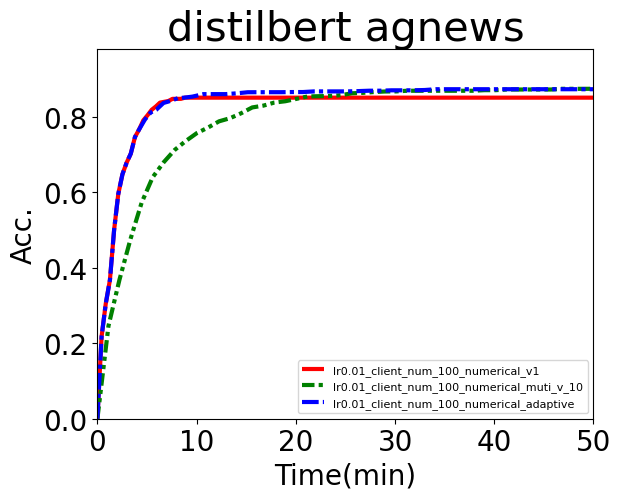

In [4]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np

eval_frequence = 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
step = 0

file_list = [
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_v1.log",
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_muti_v_10.log",
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_adaptive.log"
]

for i,file in enumerate(file_list):
    if file.endswith(".log"):
        acc = [0]
        if "v_10" in file:
            # adhoc = file.split("_")[-1].split(".")[0]
            adhoc = "10, 10, 10"
        elif "adaptive" in file:
            adhoc = "1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10"
        else:
                adhoc = None
        with open(file,"r") as f:
            cur_max = 0
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    cur_acc = float(l[l.rfind("'acc':")+7:l.rfind(",")])
                    if cur_acc > cur_max:
                        cur_max = cur_acc
                    else:
                        cur_acc = cur_max
                    acc.append(cur_acc)
                # if len(acc)>200:
                #     break
                if "adhoc" in l:
                    adhoc = l[l.rfind("[")+1:-2]
            print(file,adhoc)
            method = file.split("_")[0]
            plt.plot(round_to_time(len(acc),adhoc,eval_frequence,method), acc, linestyle=linestyle[i-step], color=colors[i-step],label=file.replace(".log","").replace("fedFwd_distilbert_agnews_","").replace("fedSgd_distilbert_agnews_",""),linewidth=lw)
    elif file.endswith(".bak"):
        step += 1
plt.xlabel("Time(min)",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,50)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"distilbert agnews",fontsize=30)
plt.show()

fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_v1.log None
fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_sampling_1.log 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

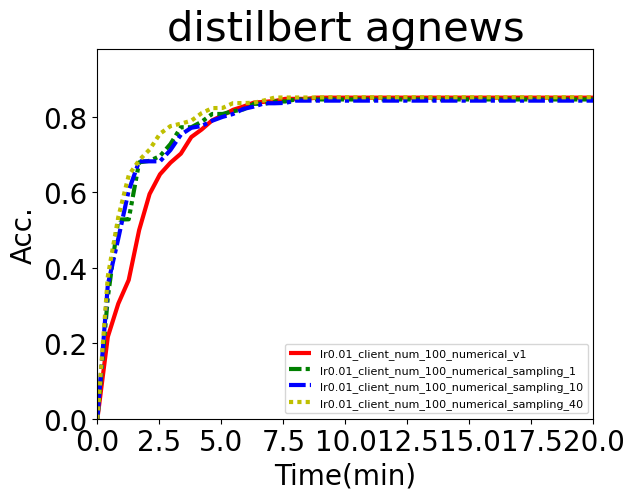

In [5]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np

eval_frequence = 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
step = 0

file_list = [
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_v1.log",
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_sampling_1.log",
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_sampling_10.log",
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_sampling_40.log",
]

for i,file in enumerate(file_list):
    if file.endswith(".log"):
        acc = [0]
        if "v_10" in file:
            # adhoc = file.split("_")[-1].split(".")[0]
            adhoc = "10, 10, 10"
        elif "adaptive" in file:
            adhoc = "1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10"
        else:
                adhoc = None
        with open(file,"r") as f:
            cur_max = 0
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    cur_acc = float(l[l.rfind("'acc':")+7:l.rfind(",")])
                    if cur_acc > cur_max:
                        cur_max = cur_acc
                    else:
                        cur_acc = cur_max
                    acc.append(cur_acc)
                # if len(acc)>200:
                #     break
                if "adhoc" in l:
                    adhoc = l[l.rfind("[")+1:-2]
            print(file,adhoc)
            method = file.split("_")[0]
            plt.plot(round_to_time(len(acc),adhoc,eval_frequence,method), acc, linestyle=linestyle[i-step], color=colors[i-step],label=file.replace(".log","").replace("fedFwd_distilbert_agnews_","").replace("fedSgd_distilbert_agnews_",""),linewidth=lw)
    elif file.endswith(".bak"):
        step += 1
plt.xlabel("Time(min)",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,20)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"distilbert agnews",fontsize=30)
plt.show()

fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_muti_v_10.log 10, 10, 10
fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_adaptive.log 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10
fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_adaptive_sampling_1.log 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 

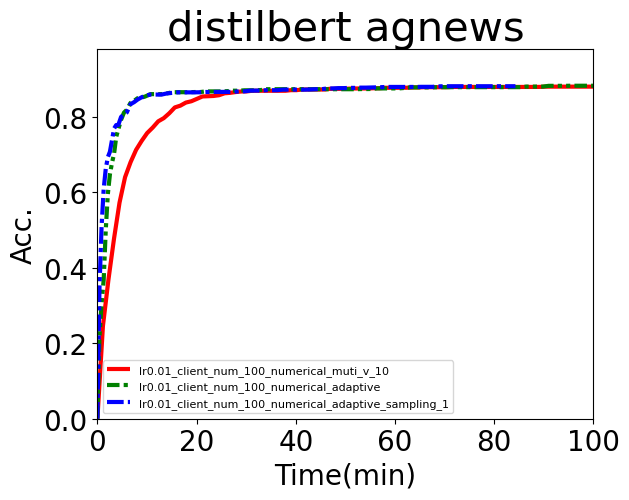

In [6]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np

eval_frequence = 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
step = 0

file_list = [
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_muti_v_10.log",
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_adaptive.log",
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_adaptive_sampling_1.log"

]

for i,file in enumerate(file_list):
    if file.endswith(".log"):
        acc = [0]
        if "v_10" in file:
            # adhoc = file.split("_")[-1].split(".")[0]
            adhoc = "10, 10, 10"
        elif "adaptive" in file:
            adhoc = "1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10"
        else:
                adhoc = None
        with open(file,"r") as f:
            cur_max = 0
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    cur_acc = float(l[l.rfind("'acc':")+7:l.rfind(",")])
                    if cur_acc > cur_max:
                        cur_max = cur_acc
                    else:
                        cur_acc = cur_max
                    acc.append(cur_acc)
                # if len(acc)>200:
                #     break
                if "adhoc" in l:
                    adhoc = l[l.rfind("[")+1:-2]
            print(file,adhoc)
            method = file.split("_")[0]
            plt.plot(round_to_time(len(acc),adhoc,eval_frequence,method), acc, linestyle=linestyle[i-step], color=colors[i-step],label=file.replace(".log","").replace("fedFwd_distilbert_agnews_","").replace("fedSgd_distilbert_agnews_",""),linewidth=lw)
    elif file.endswith(".bak"):
        step += 1
plt.xlabel("Time(min)",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,100)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"distilbert agnews",fontsize=30)
plt.show()

fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_muti_v_10.log 10, 10, 10
fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_v10_sampling_10.log 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

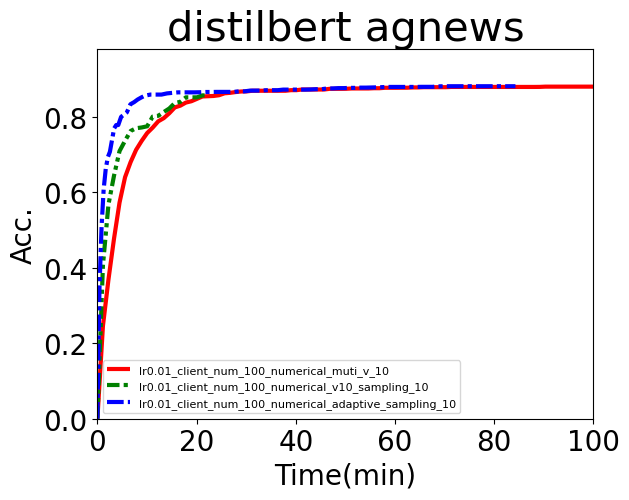

In [7]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np

eval_frequence = 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
step = 0

file_list = [
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_muti_v_10.log",
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_v10_sampling_10.log",
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_adaptive_sampling_10.log"

]

for i,file in enumerate(file_list):
    if file.endswith(".log"):
        acc = [0]
        if "v_10" in file:
            # adhoc = file.split("_")[-1].split(".")[0]
            adhoc = "10, 10, 10"
        elif "adaptive" in file:
            adhoc = "1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10"
        else:
                adhoc = None
        with open(file,"r") as f:
            cur_max = 0
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    cur_acc = float(l[l.rfind("'acc':")+7:l.rfind(",")])
                    if cur_acc > cur_max:
                        cur_max = cur_acc
                    else:
                        cur_acc = cur_max
                    acc.append(cur_acc)
                # if len(acc)>200:
                #     break
                if "adhoc" in l:
                    adhoc = l[l.rfind("[")+1:-2]
            print(file,adhoc)
            method = file.split("_")[0]
            plt.plot(round_to_time(len(acc),adhoc,eval_frequence,method), acc, linestyle=linestyle[i-step], color=colors[i-step],label=file.replace(".log","").replace("fedFwd_distilbert_agnews_","").replace("fedSgd_distilbert_agnews_",""),linewidth=lw)
    elif file.endswith(".bak"):
        step += 1
plt.xlabel("Time(min)",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,100)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"distilbert agnews",fontsize=30)
plt.show()

param_num: 66365956
[0, 55.63320617675781, 111.26641235351562, 166.89961853027341, 222.53282470703124, 278.16603088378906, 333.7992370605469, 389.4324432373047, 445.06564941406253, 500.69885559082036, 556.3320617675781, 611.9652679443359, 667.5984741210937, 723.2316802978514, 778.8648864746092, 834.498092651367, 890.1312988281247, 945.7645050048825, 1001.3977111816403, 1057.030917358398, 1112.6641235351558, 1168.2973297119136, 1223.9305358886713, 1279.563742065429, 1335.1969482421869, 1390.8301544189446, 1446.4633605957024, 1502.0965667724602, 1557.729772949218, 1613.3629791259757, 1668.9961853027335, 1724.6293914794912, 1780.262597656249, 1835.8958038330068, 1891.5290100097645, 1947.1622161865223, 2002.79542236328, 2058.428628540038, 2114.061834716796, 2169.695040893554, 2225.328247070312, 2280.96145324707, 2336.594659423828, 2392.227865600586, 2447.861071777344, 2503.494277954102, 2559.12748413086, 2614.760690307618, 2670.393896484376, 2726.027102661134, 2781.660308837892, 2837.29351

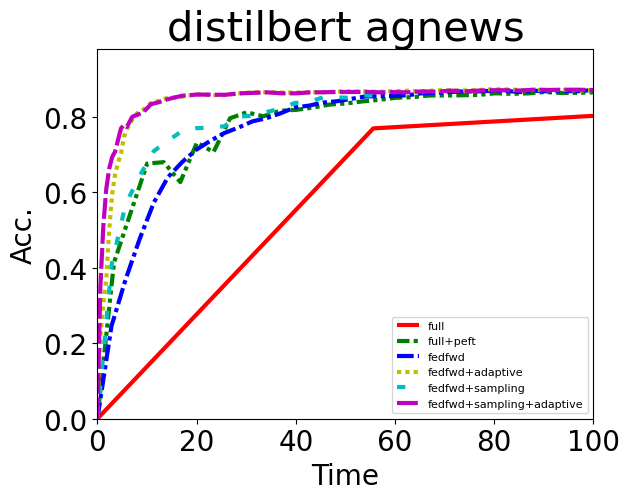

In [8]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np


dataset = "agnews"
model = "distilbert"

logging_file = {
    "full":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/distilbert_agnews/fedsgd_distilbert_agnews_lr0.01_client_num_10_full.log",
    "full+peft":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/distilbert_agnews/fedsgd_distilbert_agnews_lr0.01_client_num_10_adapter.log",
    "fedfwd":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/adaptive/distilbert_agnews/fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_muti_v_10.log",
    "fedfwd+adaptive":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/adaptive/distilbert_agnews/fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_adaptive.log",
    "fedfwd+sampling":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/adaptive/distilbert_agnews/fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_v10_sampling_10.log",
    "fedfwd+sampling+adaptive":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/adaptive/distilbert_agnews/fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_adaptive_sampling_40.log"
}

train_time_dict = {"full":20,"full+peft":12,"fedfwd":1,"fedfwd+adaptive":1,"fedfwd+sampling":1,"fedfwd+sampling+adaptive":1}
local_data_num_dict = {"agnews":15,"yahoo":18,"yelp-p":65}
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 

eval_frequence = 5 if dataset == "yahoo" else 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
    train_time = train_time_dict[method]
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "ours":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "ours":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list
    

for i,method in enumerate(logging_file):
    file = logging_file[method]
    local_data_num = local_data_num_dict[dataset]
    if "v_10" in file:
        # adhoc = file.split("_")[-1].split(".")[0]
        adhoc = "10, 10, 10"
    elif "adaptive" in file:
        adhoc = "1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10"
    else:
        adhoc = None
    with open(file) as f:
        for line in f:
            if "adhoc" in line:
                adhoc = line[line.rfind("[")+1:-2]
            if "Trainable" in line:
                param_num = int(line[line.rfind(":")+2:-2])
                print(f"param_num: {param_num}")
                break
        comm_time = param_num * 4 / comm_bandwidth
        acc = [0]
        for line in f:
            if "'acc':" in line:
                acc.append(float(line[line.rfind("'acc':")+7:line.rfind(",")]))
        print(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc))
        plt.plot(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc), acc, linestyle=linestyle[i], color=colors[i],label=method,linewidth=lw)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,100)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"{model} {dataset}",fontsize=30)
plt.show()